In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [16]:
df = pd.read_csv('dataset.csv')
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


### Formatando os nomes das colunas

In [17]:
df.columns = [x.lower().strip() for x in df.columns]
df.head()

,mdvp:fo(hz),mdvp:fhi(hz),mdvp:flo(hz),mdvp:jitter(%),mdvp:jitter(abs),mdvp:rap,mdvp:ppq,jitter:ddp,mdvp:shimmer,mdvp:shimmer(db),...,shimmer:dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


### Procurando por missing values

In [18]:
df.isnull().sum()

mdvp:fo(hz)         0
mdvp:fhi(hz)        0
mdvp:flo(hz)        0
mdvp:jitter(%)      0
mdvp:jitter(abs)    0
mdvp:rap            0
mdvp:ppq            0
jitter:ddp          0
mdvp:shimmer        0
mdvp:shimmer(db)    0
shimmer:apq3        0
shimmer:apq5        0
mdvp:apq            0
shimmer:dda         0
nhr                 0
hnr                 0
rpde                0
dfa                 0
spread1             0
spread2             0
d2                  0
ppe                 0
status              0
dtype: int64

In [19]:
df.dtypes

mdvp:fo(hz)         float64
mdvp:fhi(hz)        float64
mdvp:flo(hz)        float64
mdvp:jitter(%)      float64
mdvp:jitter(abs)    float64
mdvp:rap            float64
mdvp:ppq            float64
jitter:ddp          float64
mdvp:shimmer        float64
mdvp:shimmer(db)    float64
shimmer:apq3        float64
shimmer:apq5        float64
mdvp:apq            float64
shimmer:dda         float64
nhr                 float64
hnr                 float64
rpde                float64
dfa                 float64
spread1             float64
spread2             float64
d2                  float64
ppe                 float64
status                int64
dtype: object

In [20]:
df.shape

(195, 23)

### Distribuição das classes

Text(0.5, 1.0, 'Class Distribution')

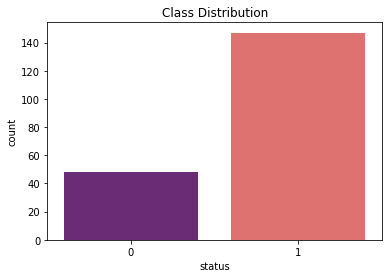

In [21]:
sb.countplot(x='status', data=df, palette='magma')
plt.title('Class Distribution')

### Verificando a correlação entre as features

In [22]:
correlations = df.corr(method='pearson')
correlations

,mdvp:fo(hz),mdvp:fhi(hz),mdvp:flo(hz),mdvp:jitter(%),mdvp:jitter(abs),mdvp:rap,mdvp:ppq,jitter:ddp,mdvp:shimmer,mdvp:shimmer(db),...,shimmer:dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
mdvp:fo(hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356,-0.383535
mdvp:fhi(hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543,-0.166136
mdvp:flo(hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071,-0.380200
mdvp:jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543,0.278220
mdvp:jitter(abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162,0.338653
mdvp:rap,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999,0.266668
mdvp:ppq,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647,0.288698
jitter:ddp,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005,0.266646
mdvp:shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771,0.367430
mdvp:shimmer(db),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058,0.350697


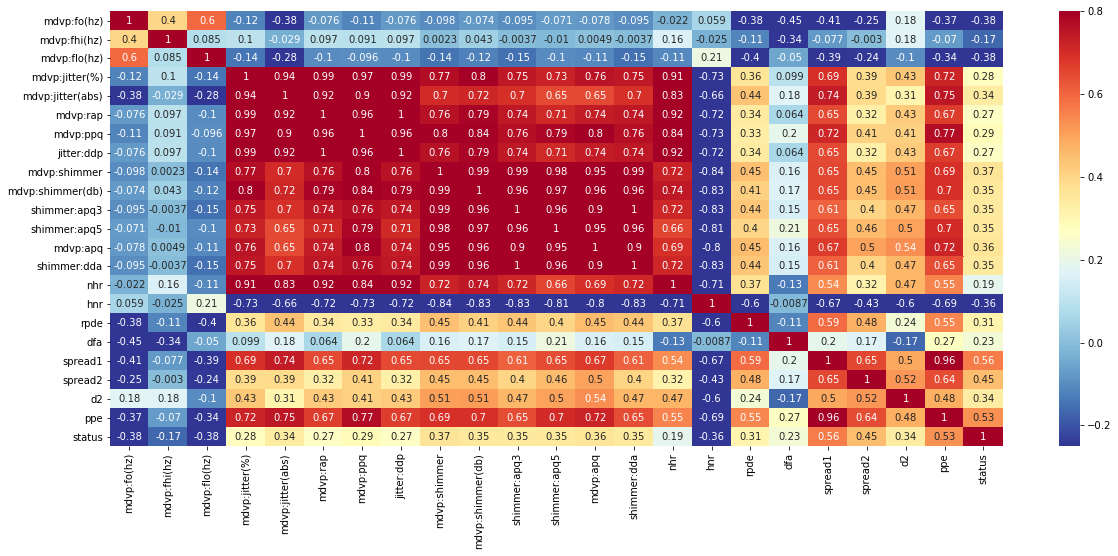

In [23]:
plt.figure(figsize = (20, 8))
sb.heatmap(correlations, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.8)

#### As features abaixo serão usadas

In [24]:
X = df[['ppe', 'd2', 'spread1', 'spread2', 'mdvp:rap', 'mdvp:shimmer']]
y = df[['status']]

In [25]:
X.head()

,ppe,d2,spread1,spread2,mdvp:rap,mdvp:shimmer
0,0.284654,2.301442,-4.813031,0.266482,0.00370,0.04374
1,0.368674,2.486855,-4.075192,0.335590,0.00465,0.06134
2,0.332634,2.342259,-4.443179,0.311173,0.00544,0.05233
3,0.368975,2.405554,-4.117501,0.334147,0.00502,0.05492
4,0.410335,2.332180,-3.747787,0.234513,0.00655,0.06425


In [26]:
y.shape

(195, 1)

In [27]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
X_train.shape

(156, 6)

In [29]:
X_test.shape

(39, 6)

In [30]:
from sklearn.linear_model import LogisticRegression
kf = KFold(n_splits=5, random_state=0, shuffle=True)

lr = LogisticRegression(C=0.5, random_state=1)
mean_auc_lr = cross_val_score(lr, X_train, y_train, n_jobs=-1, cv=kf, scoring='roc_auc').mean()
mean_auc_lr

0.904301766120988

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
mean_auc_rf = cross_val_score(rf, X_train, y_train, n_jobs=-1, cv=kf, scoring='roc_auc').mean()
mean_auc_rf

0.9261732676172036

In [32]:
from sklearn import svm
 
svm = svm.SVC()
mean_auc_svm = cross_val_score(svm, X_train, y_train, n_jobs=-1, cv=kf, scoring='roc_auc').mean()
mean_auc_svm

0.9047945197441767

In [33]:
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate=0.009, max_depth=6, min_child_weight=3,
                     subsample=0.15, colsample_bylevel=0.85, n_estimators=500)
mean_auc_xgb_model = cross_val_score(model, X_train, y_train, n_jobs=1, cv=kf, scoring='roc_auc').mean()
mean_auc_xgb_model

c:\users\alexandre\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\alexandre\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\alexandre\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\alexandre\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocess

0.8304736842105263

c:\users\alexandre\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-34-242cfd3abf17>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
c:\users\alexandre\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\alexandre\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was ex

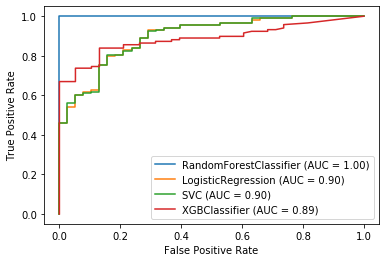

In [34]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
model.fit(X_train, y_train)

from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(rf, X_train, y_train)
plot_roc_curve(lr, X_train, y_train, ax=disp.ax_)
plot_roc_curve(svm, X_train, y_train, ax=disp.ax_)
plot_roc_curve(model, X_train, y_train, ax=disp.ax_)

### O modelo testado será o Random Forest

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error

predicted = rf.predict(X_test)

In [36]:
roc_auc_score(y_test, predicted)

0.7655172413793103

### Importando o modelo para ser utilizado na API

In [30]:
import pickle
filename = 'model.pkl'
pickle.dump(rf, open(filename, 'wb'))